In [ ]:
# test 123

In [1]:
import sys
import os
import json
import pandas as pd 
import matplotlib.pyplot as plt
# script_dir = os.path.dirname(os.path.abspath(__file__))
common_dir =os.getenv("COMMON_SCRIPT_DIR")
sys.path.insert(0, common_dir)
from metaphlan import get_abundance,get_metadata
os.chdir(os.getenv("OUTPUT_DIR"))



params_path = sys.argv[1]
output_path = sys.argv[2]
params_path="params.json"
output_path="output"

with open(params_path) as f:
    data = json.load(f)

abundance0 = get_abundance(data)

metadata = get_metadata(data)


rank = data["rank"]
top_n = data["top_num"]

In [106]:
# abundance_rank = abundance0.reset_index(['taxonomy','rank']).reset_index(drop=True).query("rank==@rank").drop("rank",axis=1)
# 
# abundance_rank.shape

In [2]:
abundance_rank = abundance0.reset_index(['taxonomy','rank']).reset_index(drop=True).query("rank==@rank").drop("rank",axis=1)

abundance_rank= abundance_rank[~abundance_rank["taxonomy"].str.contains("GGB|SGB", regex=True)]
abundance_cols = abundance_rank.columns.drop("taxonomy")
abundance_rank[abundance_cols] = abundance_rank[abundance_cols].div(abundance_rank[abundance_cols].sum(axis=0), axis=1) * 100

abundance_rank

,taxonomy,F-30-156,F-30-115,F-30-125,F-30-100,F-30-123,F-30-068,F-30-121,F-30-096,F-30-106,...,F-30-D-009,F-30-D-065,F-30-D-028,F-30-D-043,F-30-D-006,F-30-D-073,F-30-D-049,F-30-D-066,F-30-D-013,F-30-D-004
1,Euryarchaeota,0.000000,0.00000,0.000000,0.00248,0.00000,0.001400,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000
22,Actinobacteria,8.399291,4.81389,4.389050,6.09627,6.06153,14.115811,0.571860,3.147170,8.787819,...,2.231200,0.47386,3.33943,5.249581,5.20441,5.076321,3.55150,0.67991,6.596141,2.48415
440,Bacteria unclassified,0.000000,0.00000,0.000000,0.02244,0.00000,0.003430,0.000000,0.000000,0.000990,...,0.039150,0.00000,0.00966,0.000000,0.02031,0.000000,0.10656,0.00000,0.006330,0.00000
451,Bacteroidota,36.116004,24.99329,35.614806,19.53196,0.86161,7.302171,6.970129,5.769831,14.059729,...,20.893908,87.86161,16.51713,41.237204,47.78215,13.977681,37.96906,70.13887,44.551154,24.75718
989,Candidatus Melainabacteria,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000
999,Candidatus Saccharibacteria,0.000000,0.00048,0.009780,0.00182,0.03480,0.002600,0.084040,0.007490,0.003380,...,0.001340,0.00000,0.00360,0.000000,0.00000,0.004870,0.00360,0.00000,0.000970,0.00423
1061,Elusimicrobia,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000
1068,Firmicutes,54.570975,68.93918,59.192204,73.06618,91.70079,78.501688,89.932291,89.579469,75.614302,...,75.967942,11.36227,79.25442,51.988555,44.85688,80.429958,57.57804,27.15278,47.960855,72.05640
4171,Fusobacteria,0.000000,0.14047,0.000000,0.00000,0.00000,0.000000,0.000850,0.000000,0.019250,...,0.000360,0.00000,0.00000,0.012720,0.11382,0.003930,0.00000,0.00853,0.277110,0.00000
4206,Lentisphaerae,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000380,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000


In [108]:
# abundance_rank.iloc[:5,:5]

In [110]:
# metadata.iloc[:5,:5]

'faeces-HC'

In [11]:
abundance_rank_df = abundance_rank.set_index("taxonomy")
grouped = {}
for g, samples in metadata.groupby("group").groups.items():
    sub = abundance_rank_df[samples]  # 取该 group 的样本
    grouped[g] = sub.sum(axis=1)  # 按物种求和
group_df = pd.DataFrame(grouped)

# top_taxa = group_df.sum(axis=1).sort_values(ascending=False).head(10).index
# group_df = group_df.loc[top_taxa]


In [15]:
metadata

,group
sample_name,
F-30-156,faeces-SCZ
F-30-115,faeces-SCZ
F-30-125,faeces-SCZ
F-30-100,faeces-SCZ
F-30-123,faeces-SCZ
...,...
F-30-D-073,faeces-HC
F-30-D-049,faeces-HC
F-30-D-066,faeces-HC


In [17]:
metadata.groupby("group").groups[data["groups_name"]["treatment"]]

Index(['F-30-156', 'F-30-115', 'F-30-125', 'F-30-100', 'F-30-123', 'F-30-068',
       'F-30-121', 'F-30-096', 'F-30-106', 'F-30-164', 'F-30-095', 'F-30-173',
       'F-30-083', 'F-30-120', 'F-30-132', 'F-30-135', 'F-30-146', 'F-30-119',
       'F-30-148', 'F-30-098', 'F-30-145', 'F-30-175', 'F-30-153', 'F-30-103',
       'F-30-147', 'F-30-085', 'F-30-072', 'F-30-183', 'F-30-088', 'F-30-126',
       'F-30-162', 'F-30-116', 'F-30-109', 'F-30-159', 'F-30-131', 'F-30-140',
       'F-30-093', 'F-30-160', 'F-30-124', 'F-30-186', 'F-30-133', 'F-30-091',
       'F-30-077', 'F-30-094', 'F-30-081', 'F-30-122', 'F-30-180', 'F-30-130',
       'F-30-142', 'F-30-111', 'F-30-110', 'F-30-129', 'F-30-144', 'F-30-080',
       'F-30-112', 'F-30-090', 'F-30-086', 'F-30-071', 'F-30-163', 'F-30-143',
       'F-30-179', 'F-30-078', 'F-30-177', 'F-30-102', 'F-30-172', 'F-30-174',
       'F-30-069', 'F-30-114', 'F-30-070', 'F-30-099'],
      dtype='object', name='sample_name')

In [20]:
list_group = [data["groups_name"]["treatment"],data["groups_name"]["control"]]
list_group

['faeces-SCZ', 'faeces-HC']

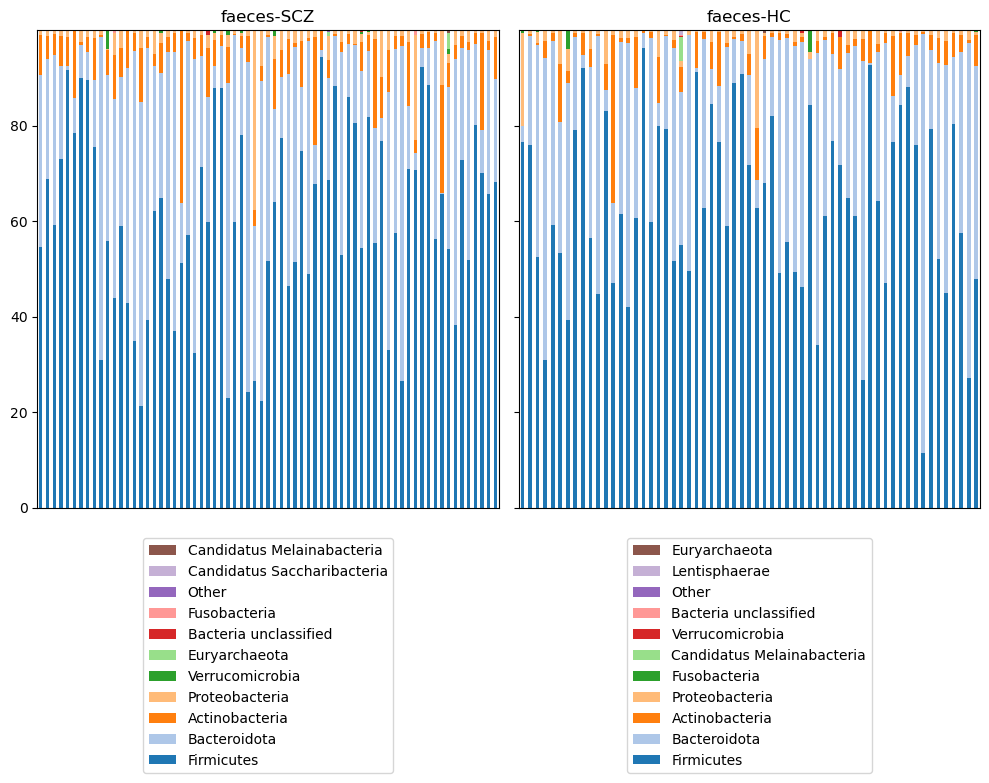

In [29]:
n_groups = metadata.groupby("group").ngroups
fig, axes = plt.subplots(1, n_groups, figsize=(5*n_groups, 8), sharey=True)

if n_groups == 1:
    axes = [axes]
for ax, (g) in zip(axes, list_group):
    samples = metadata.groupby("group").groups[g]
    taxonomy = group_df[g].sort_values(ascending=False).index
    abundance_sorted = abundance_rank_df.loc[taxonomy,samples]
    
    top_df = abundance_sorted.head(top_n).copy()
    other = abundance_sorted.iloc[top_n:, :-1].sum()  # 不算 row_sum 列
    other.name = "Other"
    group_data = pd.concat([other.to_frame().T, top_df.iloc[:, :-1]]).T
    group_data = group_data[group_data.sum().sort_values(ascending=False).index]

    n_cols = group_data.shape[1]
    colors = plt.cm.tab20.colors * ((n_cols // 20) + 1)  # 自动扩展颜色数
    
    # print(colors)
    group_data.plot(kind='bar', stacked=True, ax=ax, legend=False, color=colors[:n_cols])
        # 获取原始图例句柄和标签
    handles, labels = ax.get_legend_handles_labels()
    
    # 反转顺序
    handles, labels = handles[::-1], labels[::-1]
    # 添加全局 legend：图下方居中
    ax.legend(
        handles, labels,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.05),  # 调整为下方居中
        ncol=1,                       # 根据列数调整横排数量
        frameon=True
    )
    ax.set_title(g)
    # ax.set_xticklabels(group.index, rotation=45)
    ax.set_xlabel('')
    ax.set_xticklabels([]) 
    ax.set_xticks([])
# handles, labels = axes[0].get_legend_handles_labels()
# handles, labels = handles[::-1], labels[::-1]
# group_data
plt.tight_layout(rect=[0, 0, 1, 1])  # 预留右边空白
plt.savefig(f"{output_path}/stacked_diagram.each.top{top_n}.pdf", bbox_inches="tight")


In [113]:
# abundance_rank_df.T.loc[["F-30-156"],["Methanobrevibacter arboriphilus"]]

In [31]:

# abundance = abundance.query("not taxonomy.str.contains('GGB')")
abundance = abundance_rank.set_index("taxonomy")
# abundance["row_sum"] = abundance.sum(axis=1)
abundance["row_sum"] = abundance.sum(axis=1)
abundance_sorted = abundance.sort_values("row_sum", ascending=False)
abundance_sorted = abundance_sorted.drop("row_sum",axis=1)

# top_n = 10
top_df = abundance_sorted.head(top_n).copy()
other = abundance_sorted.iloc[top_n:, :-1].sum()  # 不算 row_sum 列
other.name = "Other"
top_df = pd.concat([top_df.iloc[:, :-1], other.to_frame().T])
top_df


abundance = top_df.T
abundance = abundance.reset_index().rename({"index":"sample_name"},axis=1)
abundance


df_merge = pd.merge(abundance,metadata.reset_index(),left_on="sample_name",right_on="sample_name")
df_merge = df_merge.set_index(['sample_name','group'])
df_merge = df_merge[df_merge.sum().sort_values(ascending=False).index]

df_merge

,,Firmicutes,Bacteroidota,Actinobacteria,Proteobacteria,Verrucomicrobia,Fusobacteria,Candidatus Melainabacteria,Euryarchaeota,Bacteria unclassified,Other,Candidatus Saccharibacteria
sample_name,group,,,,,,,,,,,
F-30-156,faeces-SCZ,54.570975,36.116004,8.399291,0.91373,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000
F-30-115,faeces-SCZ,68.939180,24.993290,4.813890,1.10066,0.00000,0.14047,0.0,0.00000,0.00000,0.01203,0.00048
F-30-125,faeces-SCZ,59.192204,35.614806,4.389050,0.79346,0.00000,0.00000,0.0,0.00000,0.00000,0.00070,0.00978
F-30-100,faeces-SCZ,73.066180,19.531960,6.096270,1.22924,0.04961,0.00000,0.0,0.00248,0.02244,0.00000,0.00182
F-30-123,faeces-SCZ,91.700790,0.861610,6.061530,1.33959,0.00000,0.00000,0.0,0.00000,0.00000,0.00168,0.03480
...,...,...,...,...,...,...,...,...,...,...,...,...
F-30-D-006,faeces-HC,44.856880,47.782150,5.204410,2.02243,0.00000,0.11382,0.0,0.00000,0.02031,0.00000,0.00000
F-30-D-073,faeces-HC,80.429958,13.977681,5.076321,0.50724,0.00000,0.00393,0.0,0.00000,0.00000,0.00000,0.00487
F-30-D-049,faeces-HC,57.578040,37.969060,3.551500,0.79124,0.00000,0.00000,0.0,0.00000,0.10656,0.00000,0.00360


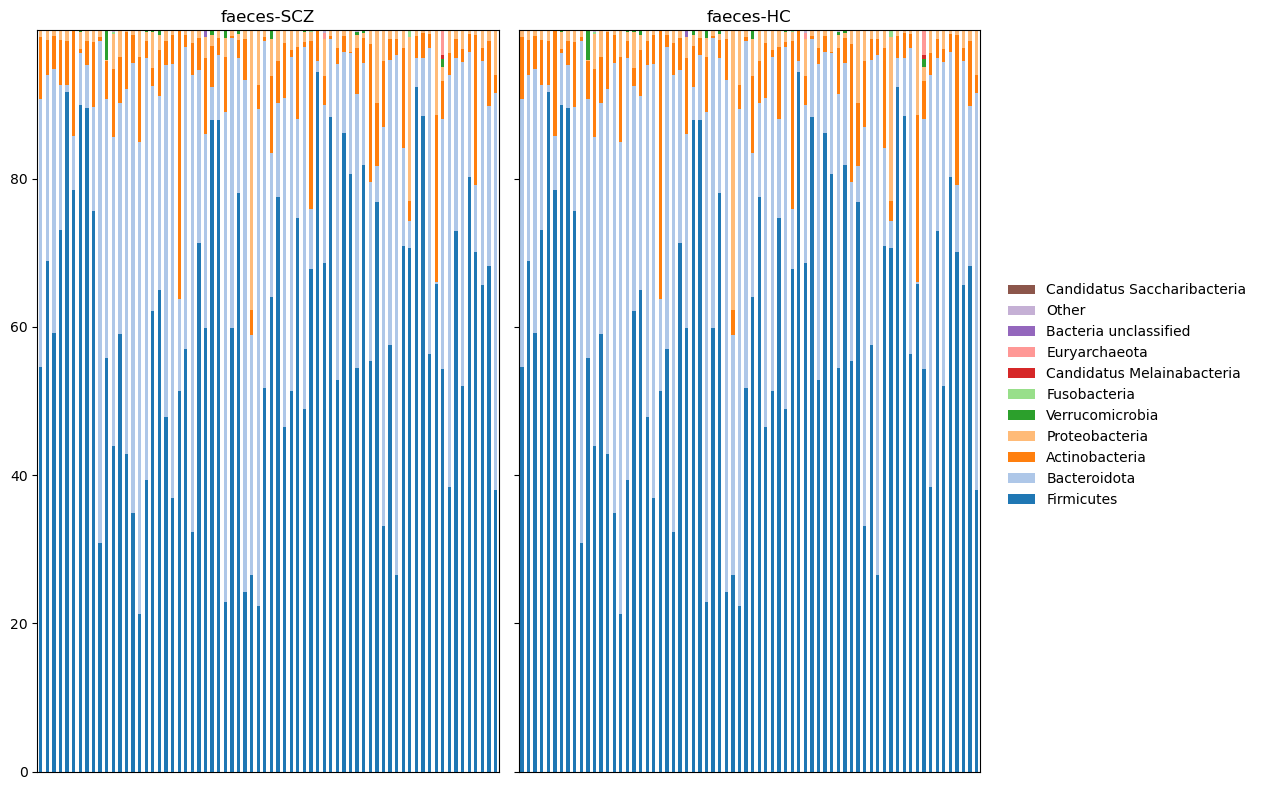

In [51]:
df = df_merge.reset_index("group")
grouped = df.groupby('group')
n_groups = grouped.ngroups
fig, axes = plt.subplots(1, n_groups, figsize=(5*n_groups, 8), sharey=True)

if n_groups == 1:
    axes = [axes]

for ax, (g) in zip(axes, list_group):
    # group_data = grouped.groups[g]
    group_data = grouped.get_group(g).drop(columns='group')
    group_data = group.drop(columns='group')
    n_cols = group_data.shape[1]
    colors = plt.cm.tab20.colors * ((n_cols // 20) + 1)  # 自动扩展颜色数

    # print(colors)
    group_data.plot(kind='bar', stacked=True, ax=ax, legend=False, color=colors[:n_cols])
    ax.set_title(g)
    ax.set_xticklabels(group.index, rotation=45)
    ax.set_xlabel('')
    ax.set_xticklabels([]) 
    ax.set_xticks([])

handles, labels = axes[0].get_legend_handles_labels()
handles, labels = handles[::-1], labels[::-1]
# 添加全局 legend：图下方居中
fig.legend(
    handles, labels,
    loc='center left',
    bbox_to_anchor=(1, 0.5),   # 根据需要可调整偏移
    ncol=1,             # 横排
    frameon=False                 # 可选：去掉图例边框
)

# 让出下方空间以容纳 legend
# plt.tight_layout(rect=[0, 0.05, 1, 1])  # 下边留出 5% 空间
plt.tight_layout(rect=[0, 0, 1, 1])  # 预留右边空白
plt.savefig(f"{output_path}/stacked_diagram.pdf", bbox_inches="tight")
# group_data

In [18]:
from skbio.diversity import alpha_diversity
from scipy.stats import mannwhitneyu  
import seaborn as sns


In [19]:
abundance = abundance_rank.set_index("taxonomy").T

In [20]:
shannon = alpha_diversity('shannon', abundance.values, ids=abundance.index)
simpson = alpha_diversity('simpson', abundance.values, ids=abundance.index)
chao1 = alpha_diversity('chao1', abundance.values, ids=abundance.index)
# faith_pd = alpha_diversity('faith_pd', abundance.values, ids=abundance.index)
observed_otus = alpha_diversity('observed_otus', abundance.values, ids=abundance.index)
pielou_e = alpha_diversity('pielou_e', abundance.values, ids=abundance.index)

/opt/conda/lib/python3.11/site-packages/skbio/util/_warning.py:42: DeprecationWarning: `observed_otus` was renamed to `sobs` in 0.6.0. The old name is kept as an alias but is deprecated.
  warn(message, warning)


In [21]:
# metadata_diversity = metadata.set_index("sample_name")

In [23]:
alpha_df = pd.DataFrame({
    'shannon': shannon,
    'species_richness': observed_otus,
    "simpson":simpson,
    "chao1":chao1,
    "pielou_e":pielou_e
})
alpha_df = alpha_df.merge(metadata, left_index=True, right_index=True).reset_index().rename({"index":"sample_name"},axis=1)

In [24]:
alpha_df.to_csv(f"{output_path}/diversity.tsv",sep="\t",index=False)

/tmp/ipykernel_490/1766423542.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=metric, data=alpha_df,
/tmp/ipykernel_490/1766423542.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=metric, data=alpha_df,
/tmp/ipykernel_490/1766423542.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y=metric, data=alpha_df,
/tmp/ipykernel_490/1766423542.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

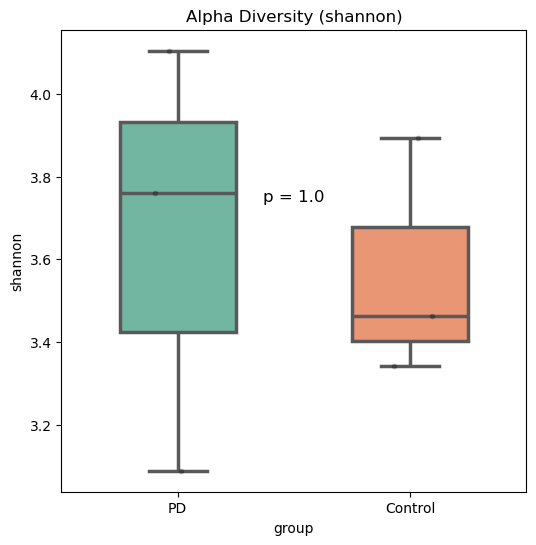

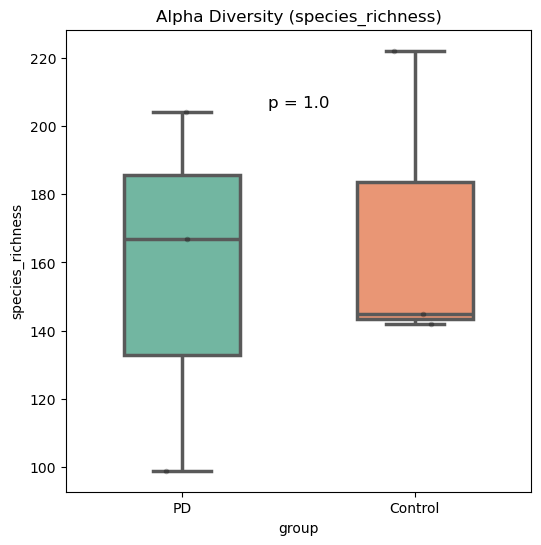

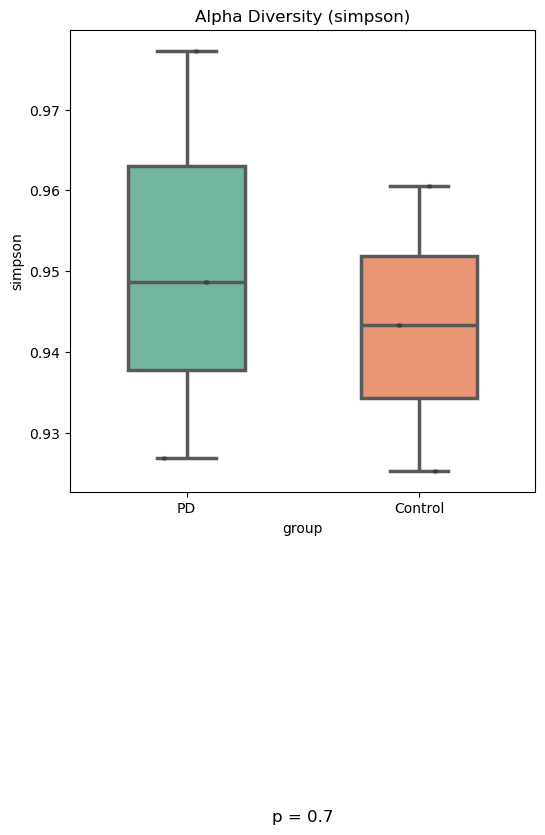

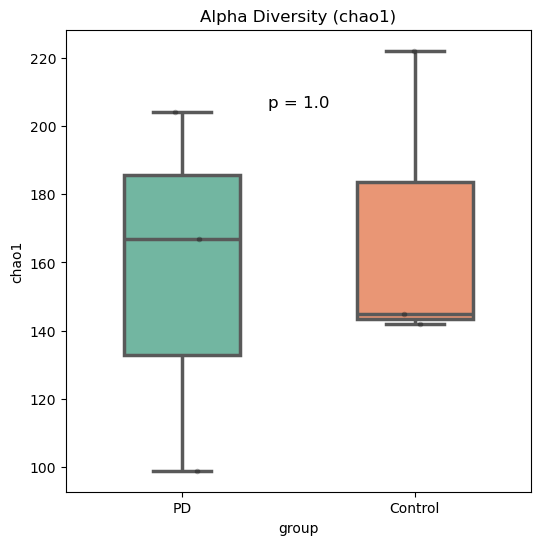

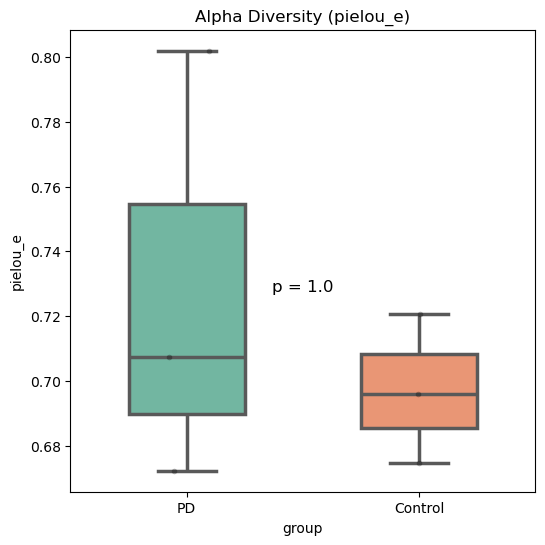

In [25]:
# metric="shannon"
def plot_diversity(metric):
    control_group = data["groups_name"]['control']
    treatment_group = data["groups_name"]['treatment']
    
    control_alpha = alpha_df.query("group == @control_group")[metric].to_list()
    treatment_alpha = alpha_df.query("group == @treatment_group")[metric].to_list()
    stat, p_value = mannwhitneyu(control_alpha, treatment_alpha, alternative='two-sided')  
    
    plt.figure(figsize=(6, 6))
    # sns.boxplot(x='group', y=metric, data=alpha_df)
    # sns.swarmplot(x='group', y=metric, data=alpha_df, color='black')
    
    ax = sns.boxplot(x='group', y=metric, data=alpha_df, 
                palette="Set2",  # 配色方案
                width=0.5,       # 箱体宽度
                linewidth=2.5,
            showfliers=False
            )    # 
    sns.stripplot(x='group', y=metric, data=alpha_df,  # 叠加散点图
                color='black', size=4, alpha=0.3)
    
    y_min,y_max = ax.get_ylim()
    plt.text(x=0.5, y=y_max*0.9, s=f"p = {round(p_value,4)}", ha="center", fontsize=12)
    
    plt.title(f'Alpha Diversity ({metric})')
    plt.savefig(f"{output_path}/{metric}_diversity.pdf", bbox_inches="tight")
plot_diversity("shannon")
plot_diversity("species_richness")
plot_diversity("simpson")
plot_diversity("chao1")
plot_diversity("pielou_e")

In [26]:
metadata

,group
sample_name,
SRR19064317,PD
SRR19064319,PD
SRR19064318,PD
SRR19064322,Control
SRR19064355,Control
SRR19064365,Control


In [27]:
abundance

taxonomy,Methanobrevibacter smithii,Actinomyces graevenitzii,Actinomyces massiliensis,Actinomyces naeslundii,Actinomyces oris,Actinomyces sp ICM47,Schaalia SGB17153,Schaalia SGB17154,Schaalia SGB17157,Schaalia SGB17158,...,Citrobacter freundii,Escherichia coli,Klebsiella pneumoniae,Klebsiella quasipneumoniae,Klebsiella variicola,Proteus mirabilis,Cloacibacillus evryensis,GGB4745 SGB6570,Akkermansia muciniphila,Akkermansia sp KLE1798
SRR19064317,1.11815,0.00000,0.0000,0.00000,0.03102,0.00000,0.00000,0.57757,0.00000,0.0803,...,0.07831,2.74576,3.04126,0.03983,0.01293,0.00714,0.00000,0.00000,0.00000,0.00000
SRR19064319,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00267,0.00000,0.00000,0.0000,...,0.00000,0.00051,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
SRR19064318,0.09774,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00038,0.03661,0.34748,0.00000
SRR19064322,0.06410,0.00022,0.0000,0.00000,0.00000,0.05045,0.00000,0.00762,0.00000,0.0000,...,0.00000,0.00587,0.00179,0.00000,0.00000,0.00000,0.00000,0.00000,0.17790,0.00000
SRR19064355,0.00000,0.00194,0.0000,0.00000,0.00000,0.00000,0.00044,0.00000,0.00000,0.0000,...,0.00000,0.00935,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,5.23803,0.00000
SRR19064365,0.00000,0.00000,0.0044,0.01621,0.03747,0.02365,0.24202,0.00000,0.00358,0.0000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.59736


In [28]:
from skbio.diversity import beta_diversity
from skbio.stats.distance import permanova
from skbio.stats.ordination import pcoa
import numpy as np
from matplotlib.patches import Ellipse


In [29]:
data = pd.merge(metadata,abundance,left_index=True, right_index=True).reset_index().set_index(['index','group'])
bc_dm = beta_diversity("braycurtis", data.values, ids=data.index)
pcoa_result = pcoa(bc_dm)
pc_df = pcoa_result.samples.loc[:, ['PC1', 'PC2']].reset_index().rename(columns={"level_1":"group"})
permanova_result = permanova(distance_matrix=bc_dm, 
                            grouping=data.reset_index().set_index(['index','group'],drop=False)['group'],
                            permutations=500)

In [30]:
def draw_confidence_ellipse(x, y, ax, edgecolor='black', facecolor='none', alpha=0.3):
    if len(x) < 2:
        return
    cov = np.cov(x, y)
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals = vals[order]
    vecs = vecs[:, order]

    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * np.sqrt(vals) * 2  # 2σ 对应约 95% 置信区间

    ell = Ellipse((np.mean(x), np.mean(y)), width=width, height=height,
                  angle=theta, edgecolor=edgecolor, facecolor=facecolor,
                  linewidth=1.5, alpha=alpha)
    ax.add_patch(ell)

/tmp/ipykernel_490/1718434267.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlabel(f"PC1 ({pcoa_result.proportion_explained[0]*100:.2f}%)")
/tmp/ipykernel_490/1718434267.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.ylabel(f"PC2 ({pcoa_result.proportion_explained[1]*100:.2f}%)")


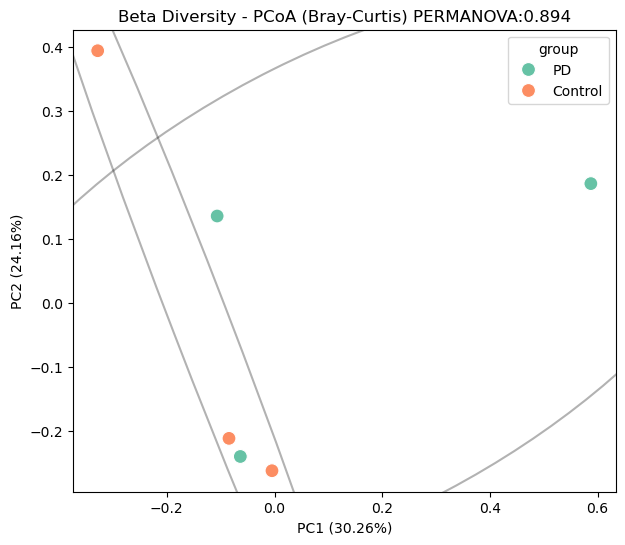

In [31]:
plt.figure(figsize=(7, 6))
sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='group', s=100, palette='Set2')
ax = plt.gca()
for g, df_g in pc_df.groupby('group'):
    draw_confidence_ellipse(df_g['PC1'], df_g['PC2'], ax)
plt.xlabel(f"PC1 ({pcoa_result.proportion_explained[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pcoa_result.proportion_explained[1]*100:.2f}%)")
plt.title(f"Beta Diversity - PCoA (Bray-Curtis) PERMANOVA:{permanova_result['p-value']:.3f}")

plt.savefig(f"{output_path}/beta_diversity.pdf", bbox_inches="tight")